w# Plotting a Grid Warped by Jacobian Matrix
### Plot unit grid
The first thing I want to do to achieve this is plot the unit grid, which I suspect will be mutatable by a Jacobian matrix later on.

It should be obvious that there is no way to plot the unit grid as a function, since the unit grid isn't a function in itself.
So, a good way to do this is to plot a scatter of points that increase in increments of 1 (or scale n) along each axis, then using Voronoi to draw lines between those points.

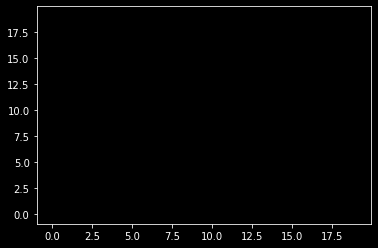

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.spatial import Voronoi, voronoi_plot_2d
# Generate coordinates
x,y = np.meshgrid(np.arange(20), np.arange(20))

# Plot points
plt.plot(x, y, marker='.', color='k', linestyle='none')

# Condense points into one object
points = np.hstack([x, y])

Now, I use Scipy's Voronoi function to draw lines between the points, hopefully making the "unit grid".

In [13]:
# Just using these values temporarily

# Voronoi stuff
vor = Voronoi(points)
verts = vor.vertices

# Filter shapes
shapes_ind = vor.regions
shapes_ind = [s+s[0:1] for s in shapes_ind if len(s)>0 and -1 not in s]
shapes = [verts[s] for s in shapes_ind]

# Plot
fig, ax = plt.subplots(figsize=(100,100))
lc = LineCollection(shapes)
ax.add_collection(lc)

QhullError: QH6214 qhull input error: not enough points(20) to construct initial simplex (need 42)

While executing:  | qhull v Qx Qbb Qc Qz
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 1503622395  voronoi  Qxact-merge  Qbbound-last  Qcoplanar-keep
  Qz-infinity-point  _zero-centrum  Qinterior-keep
  Q3-no-merge-vertices-dim-high  _maxoutside  0


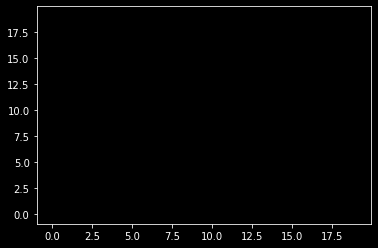

In [14]:
for i in range(0, len(x), 2):
    plt.plot(x[i:i+2], y[i:i+2], linestyle='solid', color='black')
    plt.plot(y[i:i+2], x[i:i+2], linestyle='solid', color='black')
    plt.plot(y[i:i-2], x[i:i-2], linestyle='solid', color='black')
    plt.plot(x[i:i-2], y[i:i-2], linestyle='solid', color='black')

That failed, so what I did instead was take a new approach. I decided to graph multivariate functions on a 2D plane, using contour to my advantage.
## 2D Plot

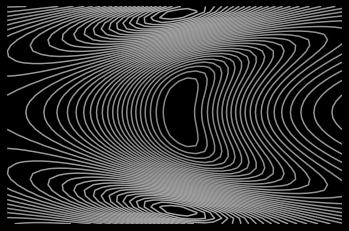

In [33]:
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
def z_func(x,y):
    return (np.cos(y**2-x)/(x**2+1))
fig = plt.figure()
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
ax.axis('off')
x = arange(-2.0,2.0,0.1)
y = arange(-2.0,2.0,0.1)
X,Y = meshgrid(x, y) # grid of point
Z = z_func(X, Y) # evaluation of the function on the grid

plt.style.use('dark_background')
# adding the Contour lines with labels
plt.contour(Z,arange(-10,10,0.05),cmap='Greys', linewidths=1.5)
plt.show()

fig.savefig('2dplot.svg', pad_inches = 0, transparent=True)

## 3D Plot

C:\Users\Jake\AppData\Local\Temp/ipykernel_3904/2382263634.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


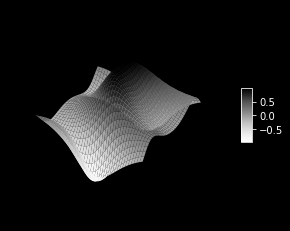

In [34]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                      cmap=cm.Greys,linewidth=0, antialiased=True)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.25, aspect=5)
plt.axis('off')
plt.grid(b=None)
plt.show()
fig.savefig('3dplot.svg', pad_inches = 0, transparent=True)